# [RVR1] PLOT WORKSPACE

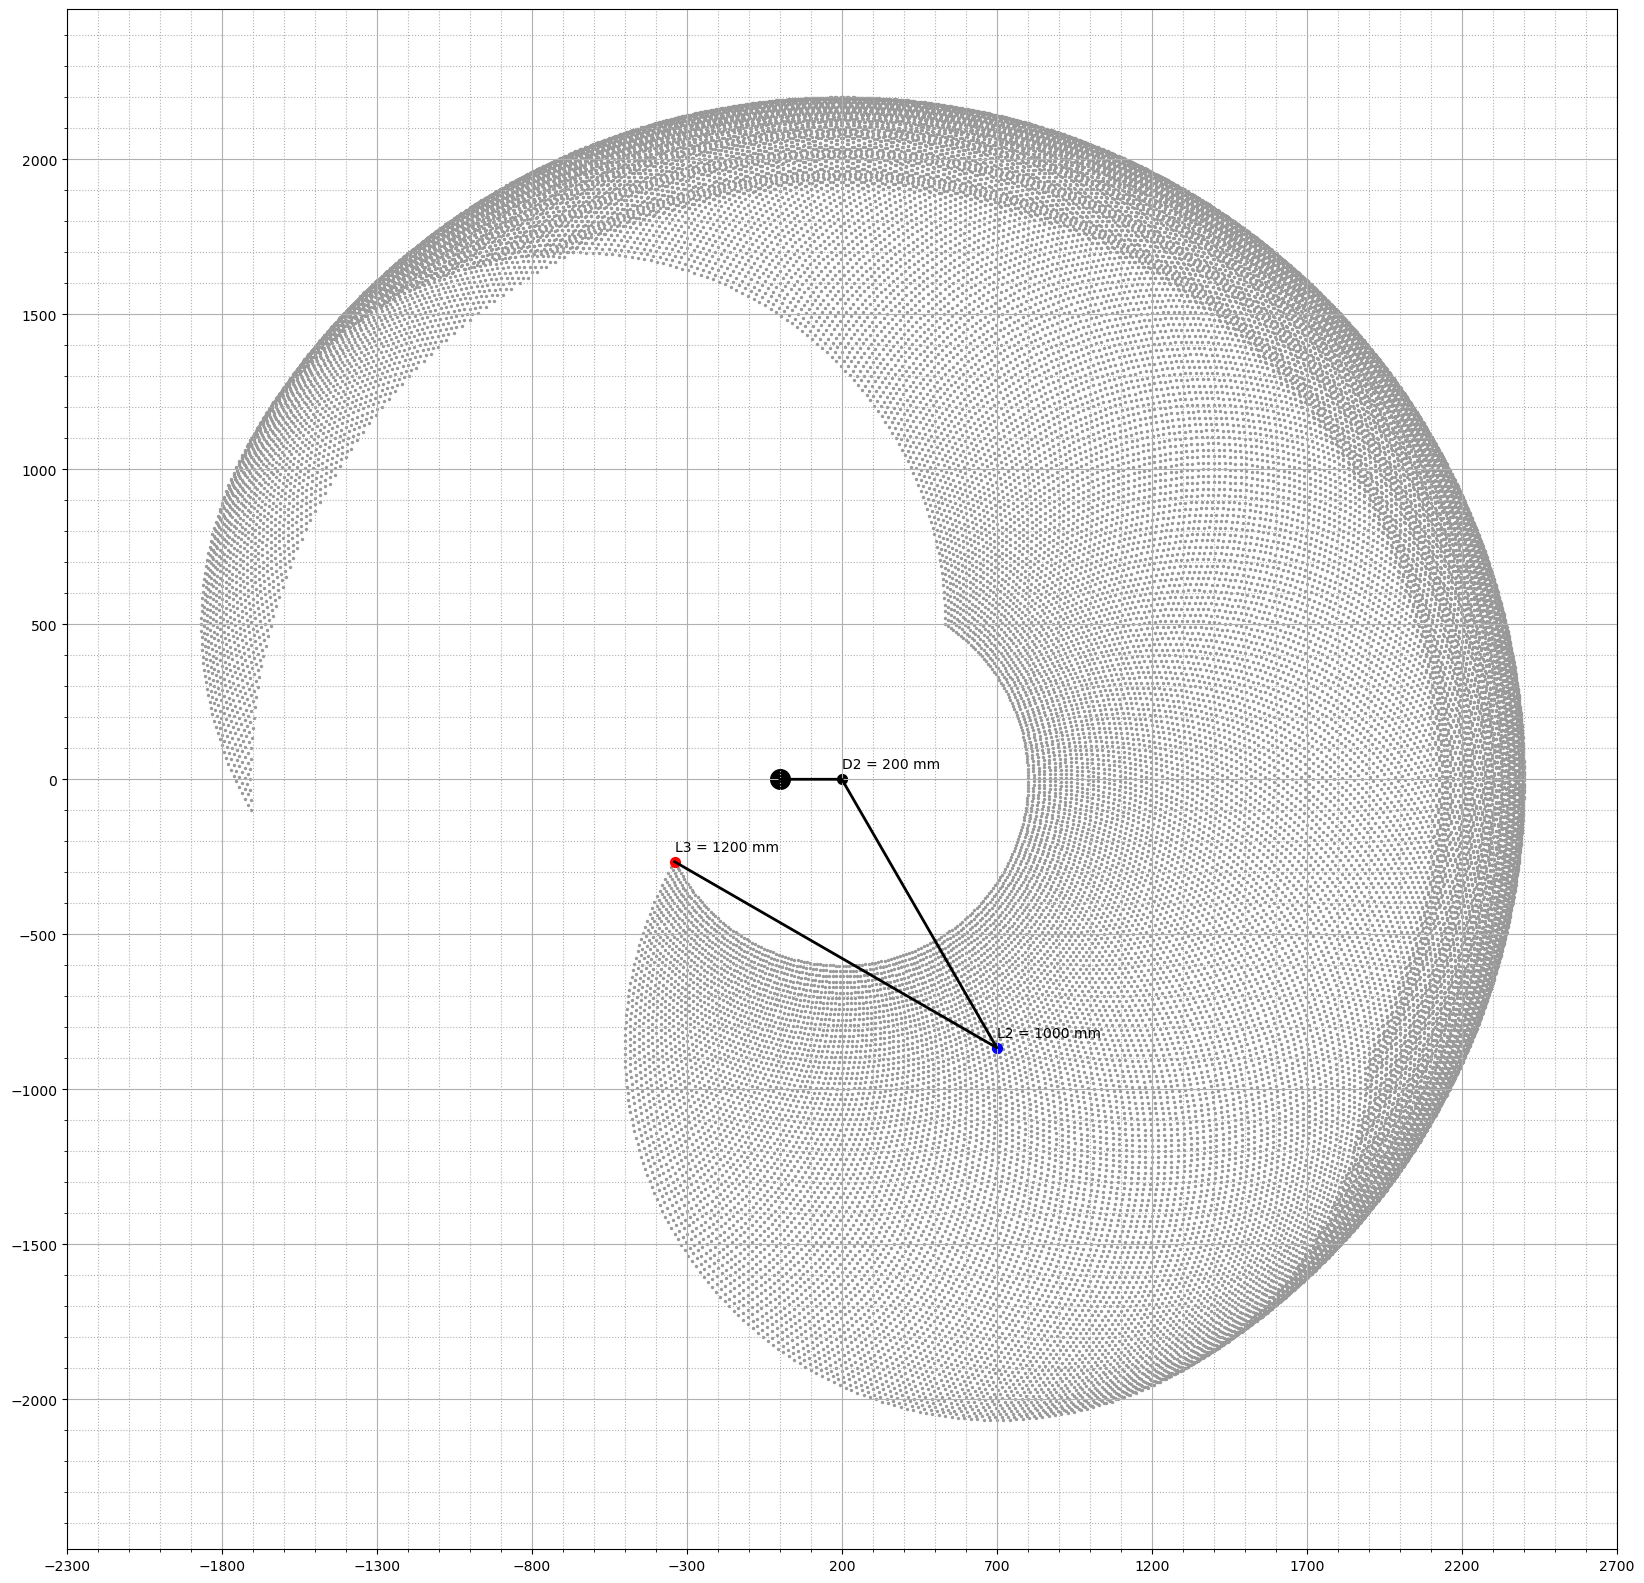

In [8]:
# Spec
D1 = 200;
L1 = 1000;
L2 = 1200;
J1 = 0;
J2 = 0;
J1min = -150;
J1max = 60;
J2min = -60;
J2max = 150;

# FK
function FK(L1,L2,J1,J2)
    J1 = deg2rad(J1+90);
    J2 = deg2rad(J2-90);    
    X1 = L1*cos(J1) + D1;
    Y1 = L1*sin(J1);
    X2 = X1 + L2*cos(J1+J2);
    Y2 = Y1 + L2*sin(J1+J2);
    return [X1,Y1], [X2,Y2]
end

# Plot
using PyPlot
#PyPlot.svg(true)

ScatterSize = 2;
ScatterColor = "#999999";
LimSize = 2500;
TickSize = 500;

figure(figsize=(20,20))
axis("equal")

minorticks_on()
grid(b="true", which="minor", linestyle=":")
grid(b="true", which="major", linestyle="-")

xlim(-LimSize+D1,LimSize+D1)
ylim(-LimSize,LimSize)
xticks([-LimSize+D1:TickSize:LimSize+D1;])
yticks([-LimSize:TickSize:LimSize;])

J1 = J1min;
J2 = J2min;
X = 0;
Y = 0;
Gap = 1;

for J1=J1min:Gap:J1max, J2=J2min:Gap:J2max
    A = FK(L1,L2,J1,J2);
    X = vcat(X,A[2][1]);
    Y = vcat(Y,A[2][2]);
end

scatter(X,Y,s=ScatterSize,color=ScatterColor)

# Posture
J1 = J1min;
J2 = J2min;
A = FK(L1,L2,J1,J2);
plot([0,D1,A[1][1],A[2][1]],[0,0,A[1][2],A[2][2]],color="#000000",linewidth=2,linestyle="-")
scatter(0,0,s=200,color="#000000")
scatter(D1,0,s=50,color="#000000")
scatter(A[1][1],A[1][2],s=50,color="#0000FF")
scatter(A[2][1],A[2][2],s=50,color="#FF0000")
char_scale = 5;
annotate("D2 = $D1 mm",xy=(D1,0+5*char_scale),ha="left",va="bottom",color="black",fontsize=10)
annotate("L2 = $L1 mm",xy=(A[1][1],A[1][2]+5*char_scale),ha="left",va="bottom",color="black",fontsize=10)
annotate("L3 = $L2 mm",xy=(A[2][1],A[2][2]+5*char_scale),ha="left",va="bottom",color="black",fontsize=10)

savefig("CASE_2-DOF.png")
